# Keras tutorial

Keras - это высокоуровневый API, написанный на Python и способный работать поверх TensorFlow, CNTK или Theano.

__Преимущество:__ Переход от идеи к результату с наименьшими затратами по времени

Вам скорее всего подойдет Keras, если от библиотеки DL вам нужно:

- Легко и быстро создавать прототипы (удобство, модульность и расширяемость)
- Поддерживать как сверточные сети, так и рекуррентные сети, а также их комбинации
- Работать без проблем на CPU или GPU

Удобство для пользователя: Keras - это API, разработанный для людей, а не для машин

## Запускаем Keras за 30 секунд:

In [62]:
from keras.models import Sequential
import keras
model = Sequential()

Стакаем слои через .add():

In [63]:
from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=100)) # input_dim=100 <=> input_shape=(100, )
model.add(Dense(units=10, activation='softmax'))

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 7,114
Trainable params: 7,114
Non-trainable params: 0
_________________________________________________________________


Для модели необохимо опредеить оптимизируемый лосс, оптимизатор и собираемые метрики качества

In [65]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Или альтернативный вариант:

In [66]:
from keras import metrics

model.compile(loss=metrics.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True),
             metrics=[metrics.categorical_accuracy])

Теперь можем запустить процесс обучения, итурируясь по батчам:

In [67]:
# Сначала сгенерируем случайные обучающие данные:
import numpy as np
from keras.utils import np_utils

x_train = np.random.random((1000, 100))
y_train = np_utils.to_categorical(np.random.randint(10, size=(1000, 1)))

In [68]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 2.3574 - categorical_accuracy: 0.1060
Epoch 2/100
1000/1000 [==============================] - 0s 61us/step - loss: 2.3040 - categorical_accuracy: 0.1270
Epoch 3/100
1000/1000 [==============================] - 0s 56us/step - loss: 2.2841 - categorical_accuracy: 0.1470
Epoch 4/100
1000/1000 [==============================] - 0s 60us/step - loss:

__Вопрос__: почему модель обучается?

Или можно запустить однократно обучение на одном конкретном батче:

In [69]:
x_batch = x_train[:10]
y_batch = y_train[:10]
model.train_on_batch(x_batch, y_batch)
# возвращает скаляр - лосс на обучающем батче

[0.42181301, 1.0]

Оценим модель, это можно сделать в одну строчку.

__Вопрос__: угадайте какой accuracy даст модель на валидационной выборке? 

In [70]:
test_size = 100
x_test = np.random.random((test_size, 100))
y_test = np_utils.to_categorical(np.random.randint(10, size=(test_size, 1)))

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
loss_and_metrics

100/100 [==============================] - 0s 2ms/step


[3.9796195030212402, 0.079999998211860657]

Или можно сделать предсказание на новом наборе данных:

In [0]:
classes = model.predict(x_test, batch_size=128)
classes

array([[  2.01599270e-01,   2.13189545e-04,   2.42562874e-05,
          8.75090045e-05,   2.04018161e-01,   1.37804914e-03,
          4.76608537e-02,   7.82760009e-02,   1.92465028e-03,
          4.64818031e-01],
       [  3.67033869e-01,   3.36206295e-02,   8.63330662e-02,
          3.34348227e-03,   2.74312906e-02,   5.29415486e-03,
          1.68193858e-02,   4.39857483e-01,   1.96730494e-02,
          5.93783217e-04],
       [  2.27243990e-01,   1.30719557e-01,   1.60321385e-01,
          4.29316722e-02,   4.51219864e-02,   5.70293404e-02,
          8.36126953e-02,   4.08726260e-02,   1.45385861e-01,
          6.67609498e-02],
       [  9.33358744e-02,   4.09381762e-02,   4.28937795e-03,
          5.90736344e-02,   4.94236261e-01,   1.08815283e-01,
          4.57791146e-03,   4.31548199e-03,   4.33744257e-03,
          1.86080545e-01],
       [  2.16699556e-01,   1.75435692e-01,   6.16818629e-02,
          5.31141832e-02,   3.42360325e-02,   5.19421920e-02,
          1.39405116e-01

__Итого:__
1. Получить данные: x_train, y_train, x_test, y_test
2. Объявить модель: слои, их параметры и тд.
3. Скомпилировать модель: лосс, оптимизатор, метрики
4. fit: обучение
5. evaluate: оцениваем качество модели
6. predict: предсказываем на отложенной выборке

## Sequential():

Два способа использования Squential.
Первый:

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

Второй, с использованием add():

In [72]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

Посмотрим внимательнее на объявление модели. 

Модели требуется указать размерность входных данных. Для этого в первый слой для Sequential (и только первый слой, т.к все последующие слои автоматически считают размернсоти) требуется передать эту информацию. Это можно сделать двумя способами: 
- Передать в первый слов параметр input_dim (только 1-мерная размерность данных) или input_shape (n мерная размерность). input_shape - tuple целочисленных значений, размерность батча не указывается
- В качестве первого слоя передать в Sequential следующий слой: ```Input(shape=(...))```

In [73]:
# Следующие объявления эквивалентны:
from keras.layers import InputLayer

model = Sequential()
model.add(Dense(10, input_shape=(100,)))

model = Sequential()
model.add(Dense(10, input_dim=100))

model = Sequential()
model.add(InputLayer(input_shape=(100, )))
model.add(Dense(10))

## Compilation

Перед обучение модели требуется сконфигурировать обучающий процесс. Для этого в метод ```model.complie()``` требуется передать три аргумента: 
- Optimizer. Это может быть как string, обозначающий один из оптимизаторов, так и instance одного из оптимизаторов
https://keras.io/optimizers/

- Loss. Функция, которую будет оптимизировать модель в ходе обучения. Это может быть как string (например, 'categorical_crossentropy' или 'mse'), так и instance класса Losses https://keras.io/losses/
- Metrics. Список метрик, которые будет собирать модель в ходе обучения. В список можно добавлять как string (напрмиер, ```metrics=['accuracy']```), так и метрики из класса Metrics https://keras.io/metrics/. Также можно добавлять кастомные метрики

Все примеры можно найти ниже:

In [74]:
# Многклассовая классификация
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Бинарная классификация
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Для задачи регрессии
model.compile(optimizer='rmsprop',
              loss='mse')

# Если хотите сделать кастомную функцию:
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])

## Training:

На обучение модели подаются данные для обучения: ```x_train``` и ```y_train```. Оба объекта - numpy массивы. Для обучения модели используется метод ```model.fit(...) ```
В fit подаются следующие аргументы:
- x: обучающая выборка
- y: ответы для обучающей выборки
- batch_size: размерность батча
- epochs: число эпох
- verbose: Integer. 0, 1, или 2. Режим оповещений в ходе обучения. 0 = тихий режим, 1 = progress bar, 2 = одна запись на одну эпоху

и т.д, см подробнее: https://keras.io/models/model/

In [75]:
# Пример: Задача бинарной классификации

# Как и описали выше, сначала объявляем Sequential() модель и накидываем слоев:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid')) # на выходе одно число, так как задача бинарной классификации

# Теперь делаем compile()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Как обычно, сгенерируем рандомно данные
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# И, наконец, запустим обучение на данных. Данные подаются батчами по 32
model.fit(data, labels, epochs=3, batch_size=32, verbose=1)

Epoch 1/3
1000/1000 [==============================] - 1s 1ms/step - loss: 0.7046 - acc: 0.5060
Epoch 2/3
1000/1000 [==============================] - 0s 69us/step - loss: 0.6942 - acc: 0.5350
Epoch 3/3
1000/1000 [==============================] - 0s 58us/step - loss: 0.6927 - acc: 0.5380


Чтобы оценить качество модели, воспользуемся методом ```model.evaluate(...)```
Для этого метода подаются аргументы: 
- x: тествоая выборка
- y: ответы на тестовую выборку
- batch_size: размер батча

In [76]:
data_test = np.random.random((1000, 100))
labels_test = np.random.randint(2, size=(1000, 1))
model.evaluate(x=data_test, y=labels_test)

1000/1000 [==============================] - 0s 313us/step


[0.72125375652313228, 0.48099999999999998]

__Вопрос__: в случае многоклассовой классификации какая функции активации будет использоваться в последнем слое?

In [78]:
# теперь многоклассовая задача:

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Генерируем данные:
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Ответы переводим в one-hot вектора
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=2, batch_size=32, verbose=1)

Epoch 1/2
1000/1000 [==============================] - 1s 814us/step - loss: 2.3418 - acc: 0.1170
Epoch 2/2
1000/1000 [==============================] - 0s 76us/step - loss: 2.3108 - acc: 0.1170


__Вопрос:__ зачем мы применяем np_utils.to_categorical для задачи многоклассовой классификации?

Снова оценим качество нашей модели:

In [82]:
data_test = np.random.random((1000, 100))
labels_test = np.random.randint(10, size=(1000, 1))
labels_test = keras.utils.to_categorical(labels_test, num_classes=10)
model.evaluate(x=data_test, y=labels_test)

1000/1000 [==============================] - 0s 25us/step


[2.3277042732238771, 0.105]

## Модуль Model()

Это альтернативный вариант построения модели, вместо Sequential()
Чтобы построить модель с помощью Model пользуйтесь следующим паттерном:
```
int = Input(...)
x = Dense(...)(int)
x = Dense(...)(x)
x = Conv2D(...)(x)
...
x = Dense(...)(x)
model = Model(inputs=inp, outputs=x)
```

После объявления модели идут стандартные: compile и fit

In [83]:
# Модуль Model:
from keras.layers import Input, Dense
from keras.models import Model
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 10))

inputs = Input(shape=(100,))

# Теперь мы применяем последовательно
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Теперь объединми всё вышенаписанное в модель:
model = Model(inputs=inputs, outputs=predictions)

# Далее всё стандарно - compile и fit
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, labels, epochs=2)

Epoch 1/2
1000/1000 [==============================] - 1s 818us/step - loss: 104.1414 - acc: 0.1000
Epoch 2/2
1000/1000 [==============================] - 0s 78us/step - loss: 103.8683 - acc: 0.1230


__Основное премущество такого подхода:__ он позволяет "склеить" две разных модели. Или скачать существующую модель и поменять в ней некоторые слои. Пример ниже:

In [86]:
# С помощью Model() можно к существующей модели добавить слои, делается это так:
from keras.applications.mobilenet import MobileNet
model = MobileNet(weights='imagenet', include_top=True)
# model.summary()

# Для начала покажем как удалить верхний слой сети:
model.layers.pop()
# model.summary()

x = model.layers[-1].output
x = Dense(200, activation='relu')(x)
x = Dense(100, activation='softmax')(x)

M = Model(inputs=model.input, outputs=x)
# M.summary()

## Ещё немного про Keras models

Модели Keras имеют следующий набор методов и аттрибутов:
- ```model.layers``` - список слоёв. К каждому элементу из списка можно обратиться
- ```model.inputs``` - тезор входных данных
- ```input_shape``` - размерность входных данных
- ```output_shape``` - размерность выходных данных
- ```model.outputs``` - тензор output
- ```model.summary()``` - печаатет информацию по вашей модели: слои, их параметры, число обучаемых параметров и т.д
- ```model.get_layer(layer_name)``` - возвращает слой по его имени
- ```model.get_config()``` - возвращает словарь: конфиг модели. Модель может быть из него собрана, пример будет ниже
- ```model.get_weights() ``` - возвращает список всех вессов модели, как  numpy массивы
- ```model.set_weights(weights)``` - устанавливает веса в модели

Ниже показаны примеры методов и аттрибутов, описанных выше:

In [87]:
model.layers

In [88]:
print(model.inputs)
print(model.outputs)
print(model.input_shape)
print(model.output_shape)

[<tf.Tensor 'input_11:0' shape=(?, 224, 224, 3) dtype=float32>]
[<tf.Tensor 'reshape_2_3/Reshape:0' shape=(?, 1000) dtype=float32>]
(None, 224, 224, 3)
(None, 1000)


In [0]:
model.summary()

In [0]:
model.get_layer(model.layers[1].name)

In [0]:
model.get_config()

In [0]:
config = model.get_config()
model1 = Model.from_config(config)
model2 = Sequential.from_config(config)

In [0]:
model1.set_weights( model.get_weights() )

In [89]:
model.layers[0].output_shape

(None, 224, 224, 3)

##  Keras layers

Все слои в Keras имеют ряд общих методов и аттрибутов:
- ```layer.input``` - тензор входных данных
- ```layer.output``` - тензор выходных данных
- ```layer.input_shape``` - размерность входных данных
- ```layer.output_shape``` - размерность выходных данных

- ```layer.get_weights()``` - возвращает веса слоя
- ``` layer.set_weights(weights)``` - устанавливает веса слоя
- ```layer.get_config()``` - возвращает конфиг слоя

Ниже показаны примеры методов и аттрибутов, описанных выше:

In [94]:
layer = model.layers[0]
print(layer.input)
print(layer.output)
print(layer.input_shape)
print(layer.output_shape)

Tensor("input_11:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("input_11:0", shape=(?, 224, 224, 3), dtype=float32)
(None, 224, 224, 3)
(None, 224, 224, 3)


In [108]:
layer.get_weights()

[]

In [109]:
layer = Dense(32)
config = layer.get_config()
reconstructed_layer = Dense.from_config(config)

### Далее поговорим про каждый тип слоя отдельно:

### InputLayer

Может пригодиться ровно один раз, для передачи информации нейронной сети о размерности входных данных

In [0]:
from keras.layers import InputLayer
model = Sequential()
model.add(InputLayer(input_shape=(1,)))
model.add(Dense(100))
model.summary()

### Dense:

Ниже представлены две картинки. На одной как обычно рисуют нейронные сети с линейными слоями, на второй - как реализовывать линейные слои через умножение матриц. Такая реализация позволяет эффективно подавать элементы батчами (т.е в одном этапе обучения участвуют сразу несколько элементов)

На данной картинке обучающая выборка состоит из 3 элементов, каждый из которых имеет одну фичу:

<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/nn_with_matrices_displayed.png" alt="Drawing" style="width: 700px;"/>

In [0]:
# Пример
model = Sequential()
model.add(Dense(32, input_shape=(16,)))
# Модель принимает на вход данные размерностью (*, 16), где * - размер батча
# На выходе модель выдает матрицу размерностью (*, 32), где * - размер батча

Также слой Dense имеет полезный параметр ```activation```, отвечающий за функцию активации. Она применяется поэлементно сразу после Dense слоя 

__Вопрос:__ Пусть i-ый слой имеет выходную размерность (n,m), а i+1-ый слой: Dense(100). Сколько обучаемых параметров у такого слоя?

### Dropout

<img src="https://mlblr.com/images/dropout.gif" alt="Drawing" style="width: 600px;"/>

In [0]:
from keras.layers import Dropout
model.add(Dropout(rate=0.2))
# rate - вероятность, с короторой выключается каждый из нейронов при обучении 

__Вопрос:__ Добавляет ли Dropuot слой обучаемых параметров?

### Flatten:

Разворачивает весь тензор в одномерный вектор. 
Например, матрица размера ```(n, m)``` превратится в вектор размера ``` n*m```

In [0]:
from keras.layers import Flatten
model = Sequential()
model.add(Flatten())

### Conv2D

<img src="https://www.cntk.ai/jup/cntk103d_conv2d_final.gif" alt="Drawing" style="width: 400px;"/>

<img src="https://i.stack.imgur.com/FjvuN.gif" alt="Drawing" style="width: 400px;"/>

Сonv2D - свертка, предназначенная только для тензоров размерности 3. Обычно размерность обозначают ```(a, b, num_channels)```. ```num_channels``` - канальность изображения. 
Kernel (окно) свертки имеет размерность ```(m, k, num_channels)```, где ```num_channels``` - число каналов (третья размерность) входного тензора. Она обязательно совпадает с ```num_channels``` входного изображения. 


Слой Conv2D в Keras имеет следующие параметры: 
- ```filters:int``` - число фильтров. Иными словами, сколько разных Kernel мы применим к нашей картинке. Каждый Kernel имеет размерность ```(m, k, num_channels)```, у каждого ```m*k*num_channels``` параметров обучаются

- ```kernel_size:int or tuple/list of 2 int``` - tuple из двух int. В наших обозначениях это (m, k)

- ```activation:str``` - функция активации, которая применяется сразу после применения слоя Conv2D
- ```strides: int or tuple/list of 2 int``` - отвечает за stride по вектрикали и горизонтали
- ```padding:str``` - принимает значение либо 'valid', либо 'same',  разница показана на каритнке: 
<img src="https://pp.userapi.com/c849532/v849532680/135e57/Eijj-dicj7o.jpg" alt="Drawing" style="width: 500px;"/>

#### Немного про размерности:
Предположим, что мы добавили слой Conv2D с дефолтными параметрами. Мы установили только ```Conv2D(filters=num_filters, kernel_size=(k, k))```. Тогда если входная размерность ```(a,b,num_channels)```, то наш слой выдаст тензор размерностью ```(a-k+1, b-k+1, num_filters)``` 

Число обучаемых параметров при этом: ```k*k*num_channels*num_filters + num_filters```

В последней формуле второе слагаемое означает bias, который применяется для каждого фильтра отдельно

In [0]:
from keras.layers import Conv2D
model = Sequential()
# В Conv2D можно подавать параметр input_shape, если это первый слой
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu', input_shape=(32, 28, 3)))

# Запись выше эквивалентна следующей записи:
model = Sequential()
model.add(InputLayer(input_shape=(32, 28, 3)))
model.add(Conv2D(1, kernel_size=(3, 3), activation='relu'))
model.summary()

__Вопрос:__ Нужна ли активация после Conv2D слоя? Или можно обойтись без неё?

### Reshape

Позволяет поменять размерность тензора. 

Например:

$(n, m) \rightarrow (m, n)$

$(n, m, k) \rightarrow (k, m, n)$

$(n, m, k) \rightarrow (n, m \cdot k)$

In [0]:
model = Sequential()
model.add(Dense(40, input_shape=(32, 28)))
model.summary()

In [0]:
from keras.layers import Reshape
# Примеры:
model.add(Reshape((8, 160)))
# теперь: model.output_shape == (None, 8, 160)

# также вы можете попросить Keras за вас посчитать оставшуюся размерность, просто подав -1
model.add(Reshape((-1, 4, 4)))
# теперт: model.output_shape == (None, 80, 4, 4)

In [0]:
model.summary()

__Вопрос:__ Слой Conv2D работает только с тензорами размерности 3. Иногда черно-белые картинки представляются в виде двумерной матрицы со значениями в каждой ячейке. Как в этом случае может помочь Reshape слой?

### MaxPooling2D

<img src="https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif" alt="Drawing" style="width: 500px;"/>

Параметры MaxPool2D:
- ```pool_size:int or tuple/list of 2 int``` - tuple из двух int. Размерность окна, в котором выбирается максимальный элемент. На гифке выше pool_size=(2,2)
- ```strides: int or tuple/list of 2 int``` - отвечает за stride по вектрикали и горизонтали
- ```padding:str``` - принимает значение либо 'valid', либо 'same',  разница показана в блоке с Conv2D

In [0]:
# Пример:
from keras.layers import MaxPool2D
model = Sequential()
model.add(InputLayer(input_shape=(32, 28, 3)))
model.add(MaxPool2D())
model.summary()

Слой MaxPool2D не имеет обучающих параметров

### AveragePooling2D

AveragePooling2D - аналогичный с MaxPool2D слой, только в окне выбирается не максимальный элемент, а среднее из всех элементов. Ниже приведен пример сравнения двух подходов:

<img src="https://qph.fs.quoracdn.net/main-qimg-cf2833a40f946faf04163bc28517959c" alt="Drawing" style="width: 500px;"/>

AveragePooling2D имеет те же аргументы, что и MaxPool2D. Он также не имеет обучающих параметров

### Activations:

Наиболее популярные функции активации:

<img src="https://cdn-images-1.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png" alt="Drawing" style="width: 500px;"/>

Более подробно про функции активации в Keras:
https://keras.io/activations/

In [0]:
# Два способа добавить активацию:
from keras.layers import ReLU

# Первый
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu' ,input_shape=(32, 28, 3)))

# Второй
model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(32, 28, 3)))
model.add(ReLU())

In [0]:
# Другие возможные функции активации:
keras.layers.ReLU()
keras.layers.LeakyReLU()
keras.layers.ELU()
keras.layers.Softmax()

__Вопрос:__ В чем проблема функции sigmoid? А в чем проблема функции relu? Когда используется softmax?

### BatchNorm

Обычно вставляется между Dense слоем и функцией активации. 
Для каждого нейрона $h_i$ выполняется нормировка по формуле: 
$$ \large{ h_i = \gamma_i \frac{h_i-\mu_i}{\sqrt{\sigma^2_i}}+ \beta_i }$$
Где: 
- $\gamma_i, \beta_i$ - тренируемые параметры
- $\mu_i, \sigma^2_i$ - среднее и оценочная дисперсия батча. При предсказании на тестовой выборке $\mu_i, \sigma^2_i$ считаются как скользящее среднее по train выборке

In [0]:
from keras.layers import BatchNormalization
model = Sequential()
model.add(Dense(5, input_dim=100))
model.add(BatchNormalization())
model.summary()

## Callbacks:

Callback - это набор функций, которые должны применяться на определенных этапах обучения. Вы можете использовать Callbacks, чтобы получить представление о модели во время обучения. Вы можете передать список Callbacks методу .fit ()

Callback имеет следующие методы: ```on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), on_batch_end()```, каждый из которых автоматически вызывается в соответсвующий момент времени. Например, метод ```on_epoch_end()``` вызывается в момент, когда прошла одна эпоха. Метод ```on_batch_end()``` вызывается в момент, когда через сеть прошел один батч.

Как использовать Callbacks? Надо просто передать список коллбеков в метод fit.
Пример: ```model.fit(x, y, callbacks=[early_stopping])```

In [0]:
# ниже приведен пример кастомного Коллбека. Единственное, что он делает - в конце эпохи записывает в переменную losses метрику 
# При этом в каждый из методов автоматически прокидывается словарь метрик logs. Например, logs={'loss': 2.5, 'acc': 0.87}
# Ниже - шаблон для кастомного коллбека, можете использовать его для создания своего коллбека
class My_Callback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        return
 
    def on_train_end(self, logs={}):
        return
 
    def on_epoch_begin(self, logs={}):
        return
 
    def on_epoch_end(self, epoch, logs={}):
        return
 
    def on_batch_begin(self, batch, logs={}):
        return
 
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        return

В Keras уже есть несколько реализованных коллбеков:

In [0]:
# Сохраняет модель в конце каждой эпохи
keras.callbacks.ModelCheckpoint(filepath='', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [0]:
# Останавливает обучение по какому либо критерию. Например, loss не уменьшается две эпохи подряд
keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [0]:
# пишет в директорию log_dir все логи в формате, который читает TensorBoard
keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

In [0]:
# Скоращает learning rate, когда loss не уменьшается несколько эпох подряд:
keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

Вы можете написать свой собственный коллбек, который будет отправлять метрики обучения в телеграмм/на почту после каждой эпохи/батча

## Losses:

Различные функции потерь, которые будет оптимизировать модель
https://keras.io/losses/

In [0]:
from keras import losses

# Функция потерь передается в модель на этапе компилирования. Следующие две записи эквивалентны:
model.compile(loss='mean_squared_error', optimizer='sgd')
model.compile(loss=losses.mean_squared_error, optimizer='sgd')

# Для задачи регрессии наиболее популярные функции:
keras.losses.mean_squared_error(y_true, y_pred)
keras.losses.mean_absolute_error(y_true, y_pred)
keras.losses.mean_absolute_percentage_error(y_true, y_pred)
keras.losses.logcosh(y_true, y_pred)

# Для задачи многоклассовой классификации:
keras.losses.categorical_crossentropy(y_true, y_pred)
# Для задачи бинарной классификации:
keras.losses.binary_crossentropy(y_true, y_pred)

## Metrics:

Метрика отличается от loss function тем, что результаты метрик никак не используются в ходе обучения. Лосс - функция, которую модель оптимизирует. Метрики - показатели перфоманса модели для человека. В то же время любую из loss функций можно использовать как метрику
https://keras.io/metrics/

Метрики, как и лосс функция, подаются на жтапе компилирования модели через аргумент metrics:

In [0]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae', 'acc'])
# Другой вариант:
from keras import metrics

model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[metrics.mae, metrics.categorical_accuracy])


# Или для задачи многоклассовой классификации:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])


Также можно сделать кастомную метрику. Делать её придется при помощи backend Кераса. Пример:

In [0]:
# Custom metrics:
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc', mean_pred])

## Optimizers:

https://keras.io/optimizers/

In [0]:
# Как обычно, можно передать через строковую переменную:
model.compile(loss='mean_squared_error', optimizer='sgd')

# а можно и через инстанс класса:
from keras import optimizers
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False))

# Другие популярные оптимизаторы:
keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

## Задача:

Создать свою нейронную сеть с:
- На вход подается черно-белое изображение размером (28, 28) 
- В сеть добавить 3 блока Свертка-MaxPool. Каждый из MaxPool имеет окно (2, 2), Число фильтров для сверток: (16, 32, 64), размеры окна для сверток во всех случаях (3, 3)
- После первого блока Conv-MaxPool добавить Dropout слой с rate=0.3
- В конце сети добавить 2 слоя Dense, первый размерность выхода (batch_size, 32). Пусть число возможных классов 10, поэтому второй Dense слой имеет размерность на выходе (batch_size, 10)
- Не забудьте добавить softmax как функция активации для последнего слоя

In [188]:
from keras.layers import Dropout

# <Your Code>

In [149]:
# Проверьте правильно ли вы построили модель:
assert model.count_params() == 25706

Теперь скомпилируем модель. Задача многоклассовой классификации, какую функцию потерь будем использовать?
В качестве оптимизатора можете выбрать свой. Метрики - accuracy

In [187]:
# <Your Code>

Сделайте model.fit() с следующими параметрами:
1. Размер батча: 64
2. Число эпох: 3
3. Отведите под валдиацию 10% выборки
4. Подайте в fit Callback: TQDMNotebookCallback() (чтобы установить pip install keras-tqdm, импорт: from keras_tqdm import TQDMNotebookCallback)

In [173]:
# Загружаем MNIST датасет:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train.shape

(60000, 28, 28)

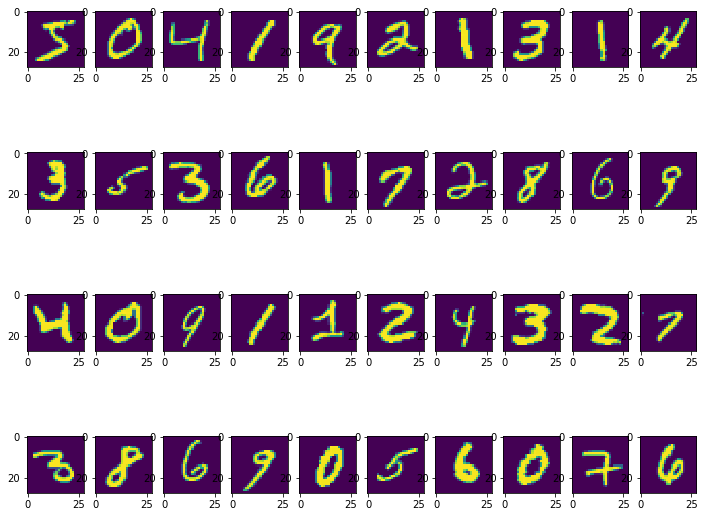

In [174]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [171]:
# Здесь сделайте fit
# <Your Code>

Теперь сделайте тот же фит, но только в список коллбеков также подайте Callback TensorBoard'a. Чтобы запустить Tensorboard: в консоле `tensorboard --logdir logs`

In [ ]:
# Объявите CallBack Тензорборда и подайте его в фит модели
# <Your Code>

In [185]:
model.evaluate(x_test, keras.utils.to_categorical(y_test))

10000/10000 [==============================] - 3s 334us/step

[0.12842827332839371, 0.95960000000000001]

Ниже визуализация верных/неверных предсказаний:


9596  classified correctly
404  classified incorrectly


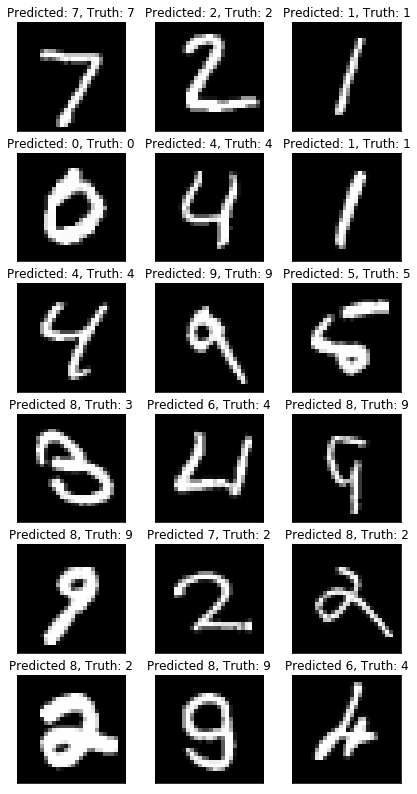

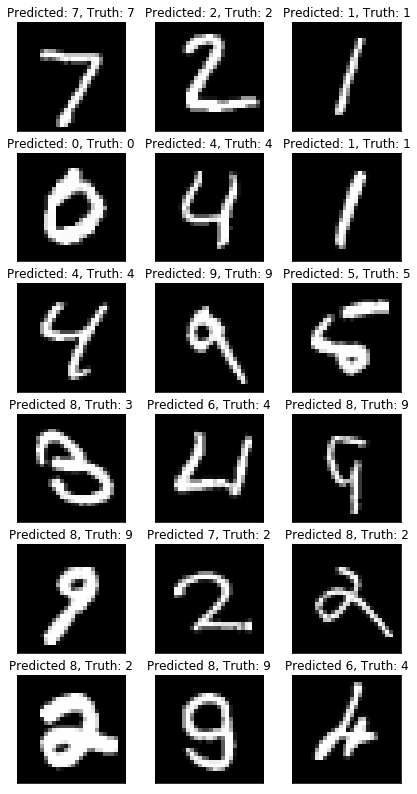

In [186]:
predicted_classes = model.predict_classes(x_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

## Visualization:

```model.fit()``` автоматически сохраняет историю обучения, которую можно визуализировать следующим образом:

Train on 750 samples, validate on 250 samples
Epoch 1/50
750/750 [==============================] - 4s 5ms/step - loss: 2.6011 - acc: 0.0933 - val_loss: 2.4431 - val_acc: 0.0640
Epoch 2/50
750/750 [==============================] - 0s 245us/step - loss: 2.3859 - acc: 0.1253 - val_loss: 2.4024 - val_acc: 0.0800
Epoch 3/50
750/750 [==============================] - 0s 231us/step - loss: 2.3550 - acc: 0.1173 - val_loss: 2.4004 - val_acc: 0.0800

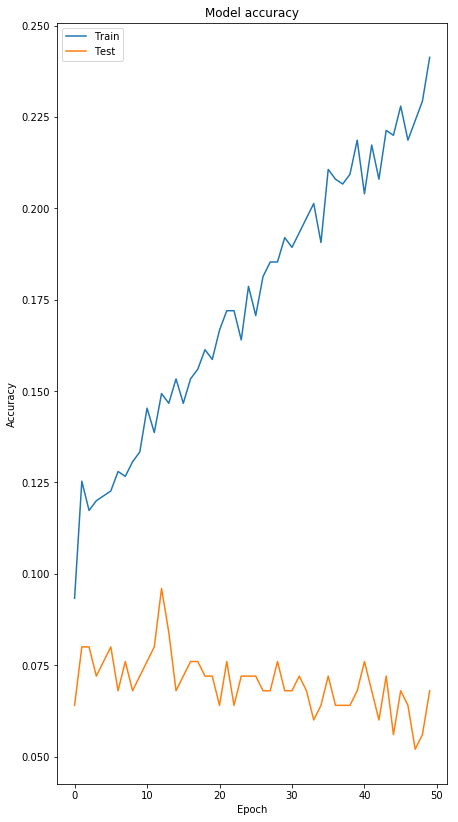

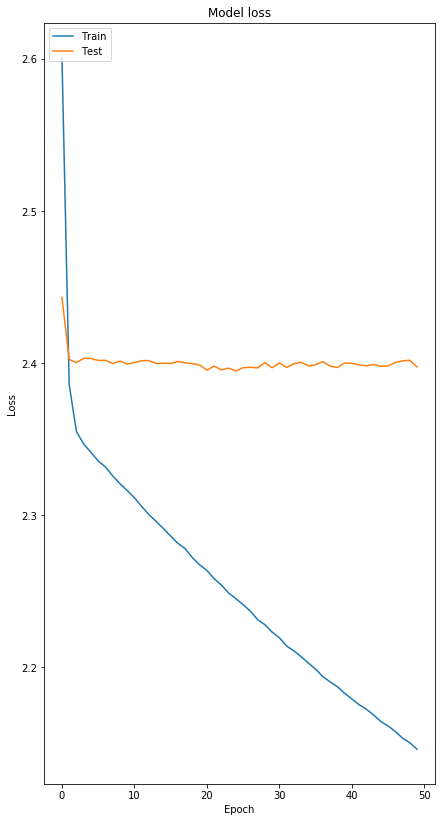

In [190]:
import matplotlib.pyplot as plt

x_train = np.random.random((1000, 100))
y_train = np_utils.to_categorical(np.random.randint(10, size=(1000, 1)))

model = Sequential()
model.add(InputLayer(input_shape=(100, )))
#model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

history = model.fit(x_train, y_train, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Либо можно воспользоваться Tensorboard, передав коллбек keras.callbacks.TensorBoard() в fit()

## Image Preprocessing

Для аугментации изображений можно использовать ImageDataGenerator

In [0]:
# Объявляем объект из класса ImageDataGenerator.
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# фитим его на данные
datagen.fit(x_train)

# делаем fit модели с аугментацией данных
model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                    steps_per_epoch=len(x_train) / 32, epochs=5)

# или можно то же самое в цикле:
for e in range(5):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=16):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(x_train) / 32:
            break

## Некоторые вопросы из FAQ:

1.Как можно импортировать обученные модели в Keras?

In [0]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetLarge
from keras.applications.nasnet import NASNetMobile
from keras.applications.mobilenet_v2 import MobileNetV2

model = VGG16(weights='imagenet', include_top=True)

 2.Как заморозить обучение некоторых слоев в нейронной сети?

In [0]:
# у каждого слоя есть параметр trainable, по умолчанию он true
for layer in model.layers[:1]:
    layer.trainable = False

3.Как мне удалить слой из модели Sequential?

In [0]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=784))
model.add(Dense(32, activation='relu'))

print(len(model.layers))  # "2"

model.pop()
print(len(model.layers))  # "1"

In [0]:
model.summary()


In [0]:
model.input_shape

4.Как мне получить output некоторого слоя нейронной сети?

In [0]:
from keras.models import Model

#model = ...  # объявите модель

# random data:
data = np.random.randint(low=1, high=10, size=(100, model.input_shape[1]))

layer_name = model.layers[0].name
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(data)

5.Как мне обучать модель, если данные не помещаются в оперативную память?


Можно использовать метод model.train_on_batch(x, y), итерируясь по батчам. Метод model.test_on_batch(x, y) позволит итерируясь по тестовым данным получить оценку качества модели


Либо можно использовать метод fit_generator(), в который передается генератор данных:

In [0]:
model.fit_generator(data_generator, steps_per_epoch, epochs)

6.Как сохранять модель из Кераса?

In [0]:
model.save(filepath) # architecture, weights, loss, the state of the optimizer, allowing to resume training exactly where you left off.
keras.models.load_model(filepath)

7.Как мне запустить обучение модели на GPU? Ответ: Keras это сделает за вас автоматически
Чтобы узнать список используемых GPU и првоерить видит ли их Keras:

In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

8.Как запустить обучение модели на нескольких GPU?

In [170]:
from keras.utils import multi_gpu_model

# Replicates `model` on 8 GPUs.
# This assumes that your machine has 8 available GPUs.
parallel_model = multi_gpu_model(model, gpus=8)
parallel_model.compile(loss='categorical_crossentropy',
                       optimizer='rmsprop')

# This `fit` call will be distributed on 8 GPUs.
# Since the batch size is 256, each GPU will process 32 samples.
parallel_model.fit(x, y, epochs=20, batch_size=256)

ValueError: To call `multi_gpu_model` with `gpus=8`, we expect the following devices to be available: ['/cpu:0', '/gpu:0', '/gpu:1', '/gpu:2', '/gpu:3', '/gpu:4', '/gpu:5', '/gpu:6', '/gpu:7']. However this machine only has: ['/cpu:0']. Try reducing `gpus`.